<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [114]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **8th Grade Reading**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [116]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


# Remove 8th grade reading NaN as that is what I'm trying to predict
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)



<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [171]:
# Remove 4th grade reading NaN as that is a feature used
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

# Remove 8th grade math NaN as that is a feature used
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

Final feature list: **['AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE']**

Feature selection justification: **I picked these features because they both have a pretty good correlation with 8th grade reading scores, as seen in the visualizations.**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Reading vs. Math Scores For 8th Graders')

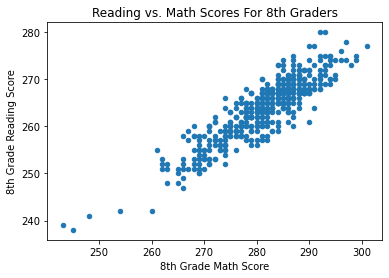

In [172]:
df.plot.scatter(x='AVG_MATH_8_SCORE',y='AVG_READING_8_SCORE')
plt.xlabel('8th Grade Math Score')
plt.ylabel('8th Grade Reading Score')
plt.title('Reading vs. Math Scores For 8th Graders')

**The first visualization represents the positive correlation between reading and math scores for 8th grader**

Visualization 2

Text(0.5, 1.0, '8th Grade vs 4th Grade Reading Scores')

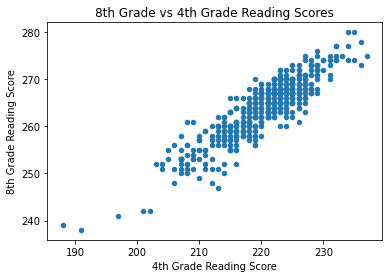

In [173]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_READING_8_SCORE')
plt.xlabel('4th Grade Reading Score')
plt.ylabel('8th Grade Reading Score')
plt.title('8th Grade vs 4th Grade Reading Scores')

**The second visualization represents the positive correlation between 8th grade and 4th grade reading scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = X = df[['AVG_READING_4_SCORE','AVG_MATH_8_SCORE']]
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [187]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [188]:
# create your model here
model = LinearRegression()

In [189]:
model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = model.predict(X_test)

In [157]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

R^2 Score: 0.8279940427749197
Root Mean Square Error: 1.6704247548606617


Text(0, 0.5, '8th Grade Reading Score')

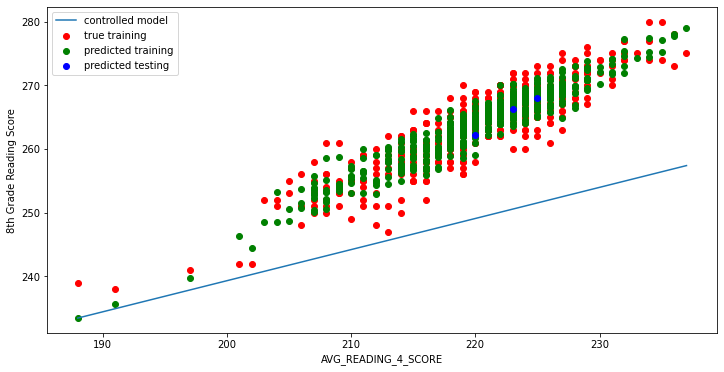

In [195]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

print("R^2 Score: " + str(model.score(X_test, y_test)))
print("Root Mean Square Error: " + str(np.mean((model.predict(X_test)-y_test)**2)**0.5))

col_name = 'AVG_READING_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th Grade Reading Score")



<h2> Summary </h2>

**I tackled the problem by focusing on 8th Grade Reading Scores. I decided to choose 8th Grade Math Scores and 4th Grade Reading Scores because looking at their distributions, they seemed to be pretty correlated. So I removed all NaN values in those columns and graphed the correlation in the visualizations. I used all the data provided (that did not have an NaN in 8th Grade reading, math, or 4th grade reading). I used a 70-30 split of training vs. testing because I wanted to get the majority of data as training while not overfitting. Then I ran a linear regression model. The results I found are that 8th grade reading scores are strongly correlated to 4th grade reading scores and 8th grade math scores. I believe the 8th grade reading score can be predicted using 4th grade reading and 8th grade math scores because the R^2 score is 0.8280 and a root mean squared error of 1.6704 which is pretty good since the data only ranges from 240 to 280.**
